# **Cycle Analyzer**

### Importing the required packages

In [1]:
import pandas as pd 
import numpy as np
import collections
import datetime as datetime
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## Plotting my application cycle

In [2]:
# Setting the main file directory
main_dir = "C:/Users/TooFastDan/Documents/MD_PhD Application/Cycle Analyzer"

In [20]:
# Importing the excel doc and processing it
dan = pd.read_excel("C:/Users/TooFastDan/Downloads/test2.xlsx")

# Getting the actions (column) names and melting the df into a favorable format, dropping any unnamed columns
dan = dan.loc[:, ~dan.columns.str.contains("Unnamed")]
col1 = dan.columns[0]
dan = dan.melt(id_vars=col1, value_vars=dan.columns[1:], var_name="Actions", value_name="Dates")
dan["Dates"] = pd.to_datetime(dan["Dates"])

# Grouping by application actions and sorting by date
dan_gb1 = dan.groupby("Actions")
dan_sort_list1 = []
for name, group in dan_gb1:
    group = group.sort_values("Dates", ascending=True)
    dan_sort_list1.append(group)
dan_sort1 = pd.concat(dan_sort_list1, axis=0).reset_index(drop=True)

# Ranking the events by date, ignoring dates that are not present
numbers = []
for action in dan_sort1["Actions"].unique():
    n = 0
    df = dan_sort1[dan_sort1["Actions"]==action]
    for d in df["Dates"]:
        if pd.isnull(d):
            numbers.append(n)
        else:
            n = n + 1
            numbers.append(n)
dan_sort1["tracker"] = numbers

dan_filt = dan_sort1[dan_sort1["Dates"].notna()]
start_date = min(dan_filt["Dates"])
end_date = max(dan_filt["Dates"])

# Adding the start date of the cycle and the current date and sorting
dan_gb2 = dan_sort1.groupby("Actions")
dan_sort_list2 = []
for name, group in dan_gb2:
    df1 = {col1:"Start", "Actions":group["Actions"].unique()[0], "Dates":start_date, "tracker":0}
    df2 = {col1:"End", "Actions":group["Actions"].unique()[0], "Dates":end_date, "tracker":np.max(group["tracker"])}
    group = group.append([df1, df2], ignore_index=True)
    group = group.sort_values(["Dates", "tracker"], ascending=True)
    dan_sort_list2.append(group)
dan_sort2 = pd.concat(dan_sort_list2, axis=0).reset_index(drop=True)

# Displaying the finalized df and optionally exporting to excel
display(dan_sort1)
#dan_sort2.to_excel("C:/Users/TooFastDan/Downloads/test2_processed.xlsx", index=False)

,Schools,Actions,Dates,tracker
0,Einstein,Acceptance Date,NaT,0
1,UW MSTP,Acceptance Date,NaT,0
2,Hofstra,Acceptance Date,NaT,0
3,UCSF,Acceptance Date,NaT,0
4,Rochester,Acceptance Date,NaT,0
...,...,...,...,...
145,Miami Miller,Waitlist Date,NaT,0
146,Minnesota,Waitlist Date,NaT,0
147,Case Western Lerner,Waitlist Date,NaT,0
148,Case Western MSTP,Waitlist Date,NaT,0


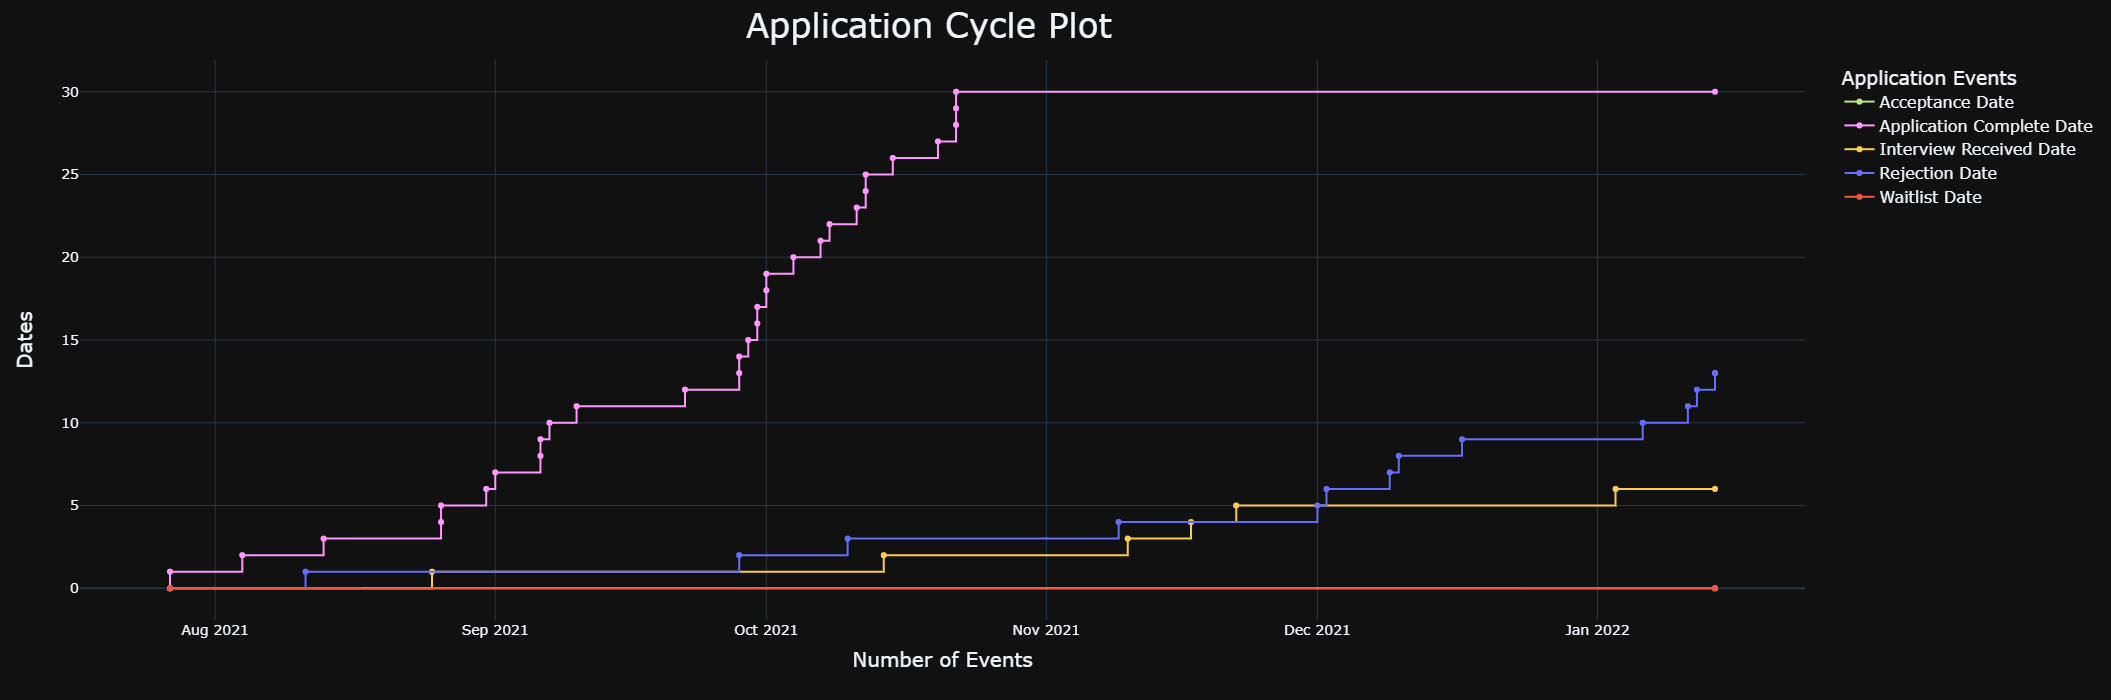

In [21]:
# Plotting the figure
fig = px.line(dan_sort2, x="Dates", y="tracker", color="Actions", 
              hover_data=["Schools", "Actions", "Dates"], markers=True, line_shape="hv", color_discrete_map=color_map,
              template=response_answer, width=1200, height=700)
# Updating the figure with title + axes + legend labels, font sizes for the title + x, y ticks + legend size, and x, y axes labels.  Then centering the title.
fig.update_layout(title="Application Cycle Plot",
                 xaxis_title="Number of Events",
                 yaxis_title="Dates",
                 legend_title="Application Events",
                 font=dict(size=24))
fig.update_layout(yaxis=dict(tickfont=dict(size=14)), xaxis=dict(tickfont=dict(size=14)))
fig.update_layout(legend=dict(font=dict(size=16)))
fig.update_xaxes(title_font=dict(size=20))
fig.update_yaxes(title_font=dict(size=20))
fig.update_layout(title={'text': "Application Cycle Plot", 'y':0.98, 'x':0.44, 'xanchor': 'center', 'yanchor': 'top'})
fig.show()

In [13]:
# Importing the excel doc and processing it
dan = pd.read_excel(main_dir+"/example_excel_files/Dan's Application Cycle Dark.xlsx")
# Getting the actions (column) names and melting the df into a favorable format
column_names = list(dan.columns)
col1 = column_names[0]
column_names = column_names[1:]
dan = dan.melt(id_vars=col1, value_vars=column_names, var_name="Actions", value_name="Dates")
dan["Dates"] = pd.to_datetime(dan["Dates"])
dan = dan[dan["Dates"].notna()]
dan

,Schools,Actions,Dates
0,Harvard,Secondary Invite,2021-07-06
1,University of Washington,Secondary Invite,2021-07-12
2,Duke,Secondary Invite,2021-07-15
3,UC San Diego,Secondary Invite,2021-06-30
4,Stanford,Secondary Invite,2021-07-02
...,...,...,...
173,University of Colorado,Waitlist,2021-09-28
199,Stony Brook,Withdraw,2022-01-12
202,University of Colorado,Withdraw,2022-01-14
211,Baylor,Acceptance,2021-12-23


In [31]:
dan_gb = dan.groupby(["Schools", "Actions"])
for name, group in dan_gb:
    print(group)

    Schools     Actions      Dates
211  Baylor  Acceptance 2021-12-23
    Schools    Actions      Dates
124  Baylor  Interview 2021-10-21
   Schools           Actions      Dates
95  Baylor  Interview Invite 2021-09-21
  Schools           Actions      Dates
8  Baylor  Secondary Invite 2021-07-01
   Schools               Actions      Dates
37  Baylor  Secondary Submission 2021-07-03
                             Schools    Actions      Dates
135  Case Western Reserve University  Interview 2021-12-01
                             Schools           Actions      Dates
106  Case Western Reserve University  Interview Invite 2021-08-26
                            Schools           Actions      Dates
19  Case Western Reserve University  Secondary Invite 2021-07-09
                            Schools               Actions      Dates
48  Case Western Reserve University  Secondary Submission 2021-07-16
                             Schools   Actions      Dates
164  Case Western Reserve University  Wa

In [39]:
date_min = min(dan["Dates"])
date_max = max(dan["Dates"])
time_elapsed = (date_max - date_min).days
dates = []
for d in range(time_elapsed+1):
    date = date_min + datetime.timedelta(days=d)
    date = pd.to_datetime(date)
    dates.append(date)
dates_series = pd.Series(dates)
dates_df = pd.DataFrame(columns=dates_series, index=column_names)
dates_df

,2021-06-25,2021-06-26,2021-06-27,2021-06-28,2021-06-29,2021-06-30,2021-07-01,2021-07-02,2021-07-03,2021-07-04,...,2022-01-05,2022-01-06,2022-01-07,2022-01-08,2022-01-09,2022-01-10,2022-01-11,2022-01-12,2022-01-13,2022-01-14
Secondary Invite,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Secondary Submission,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rejection,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Interview Invite,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Interview,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Waitlist,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Withdraw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Acceptance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
for d in dates_df.columns:
    temp_df = dan[dan["Dates"]==d]
    print(temp_df["Actions"].value_counts())

Secondary Invite    3
Name: Actions, dtype: int64
Secondary Submission    2
Secondary Invite        1
Name: Actions, dtype: int64
Series([], Name: Actions, dtype: int64)
Secondary Invite    1
Name: Actions, dtype: int64
Secondary Submission    1
Name: Actions, dtype: int64
Secondary Invite        2
Secondary Submission    1
Name: Actions, dtype: int64
Secondary Invite    3
Name: Actions, dtype: int64
Secondary Submission    2
Secondary Invite        1
Name: Actions, dtype: int64
Secondary Submission    1
Name: Actions, dtype: int64
Secondary Invite        1
Secondary Submission    1
Name: Actions, dtype: int64
Secondary Submission    1
Name: Actions, dtype: int64
Secondary Invite        2
Secondary Submission    1
Name: Actions, dtype: int64
Secondary Invite    3
Name: Actions, dtype: int64
Secondary Submission    1
Name: Actions, dtype: int64
Secondary Invite    2
Name: Actions, dtype: int64
Secondary Submission    1
Name: Actions, dtype: int64
Secondary Submission    2
Name: Actions,

In [34]:
for index, row in dan.iterrows():
    if row[1]=="Secondary Invite":
        print(row[2])

2021-07-06 00:00:00
2021-07-12 00:00:00
2021-07-15 00:00:00
2021-06-30 00:00:00
2021-07-02 00:00:00
2021-07-30 00:00:00
2021-06-25 00:00:00
2021-07-07 00:00:00
2021-07-01 00:00:00
2021-07-09 00:00:00
2021-07-12 00:00:00
2021-06-25 00:00:00
2021-07-07 00:00:00
2021-07-16 00:00:00
2021-06-25 00:00:00
2021-07-04 00:00:00
2021-06-28 00:00:00
2021-07-01 00:00:00
2021-07-12 00:00:00
2021-07-09 00:00:00
2021-07-07 00:00:00
2021-07-14 00:00:00
2021-07-15 00:00:00
2021-06-26 00:00:00
2021-07-20 00:00:00
2021-06-30 00:00:00
2021-07-01 00:00:00
2021-07-06 00:00:00
2021-07-20 00:00:00


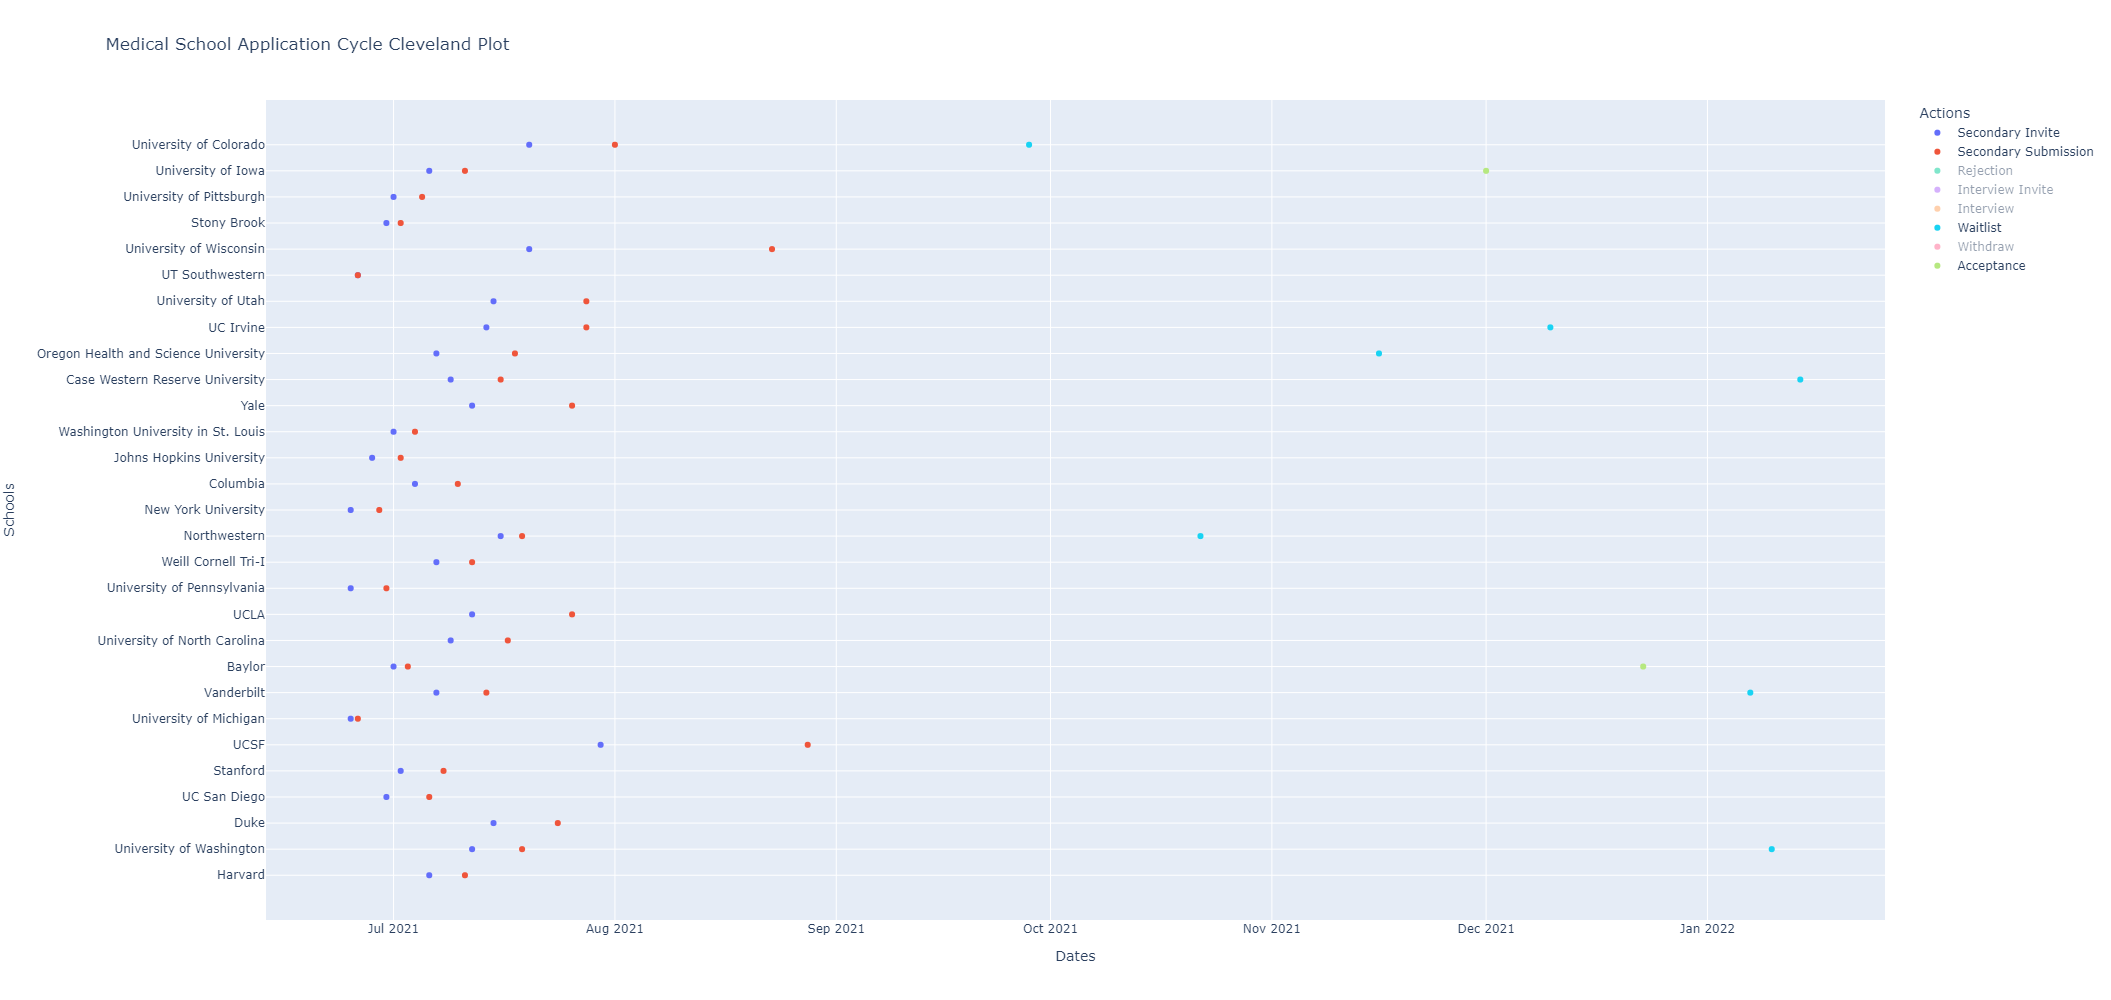

In [10]:
df = dan[dan["Dates"].notna()]

cleveland = px.scatter(df, x="Dates", y="Schools", color="Actions", title="Medical School Application Cycle Cleveland Plot", width=1000, height=1000)
cleveland.show()

In [60]:
def value_generator(df, col):
    new_nums = []
    n = 0
    for i in df[col]:
        if i > 0:
            n = n + i
            new_nums.append(n)
        else:
            new_nums.append(n)
    return new_nums

In [80]:
df = dan_sort1[dan_sort1["Dates"].notna()].drop(["Schools", "tracker"], axis=1)
df = df.groupby([df['Dates'].dt.to_period('W'), 'Actions']).count().unstack()
df.columns = df.columns.droplevel()

for c in df.columns:
    df[c] = value_generator(df=df, col=c)
df = df.reset_index()

df = df.melt(id_vars="Dates", value_vars=['Acceptance', 'Interview', 'Interview Invite', 'Rejection', 'Secondary Invite', 'Secondary Submission', 'Waitlist', 'Withdraw'], var_name="Actions", value_name="Number_Binned")

updated_dates = []
for d in df["Dates"]:
    d = str(d)
    d = d[11:]
    d = pd.to_datetime(d)
    updated_dates.append(d)
df["Dates"] = updated_dates

df

,Dates,Actions,Number_Binned
0,2021-06-27,Acceptance,0.0
1,2021-07-04,Acceptance,0.0
2,2021-07-11,Acceptance,0.0
3,2021-07-18,Acceptance,0.0
4,2021-07-25,Acceptance,0.0
...,...,...,...
187,2021-12-12,Withdraw,0.0
188,2021-12-19,Withdraw,0.0
189,2021-12-26,Withdraw,0.0
190,2022-01-09,Withdraw,0.0


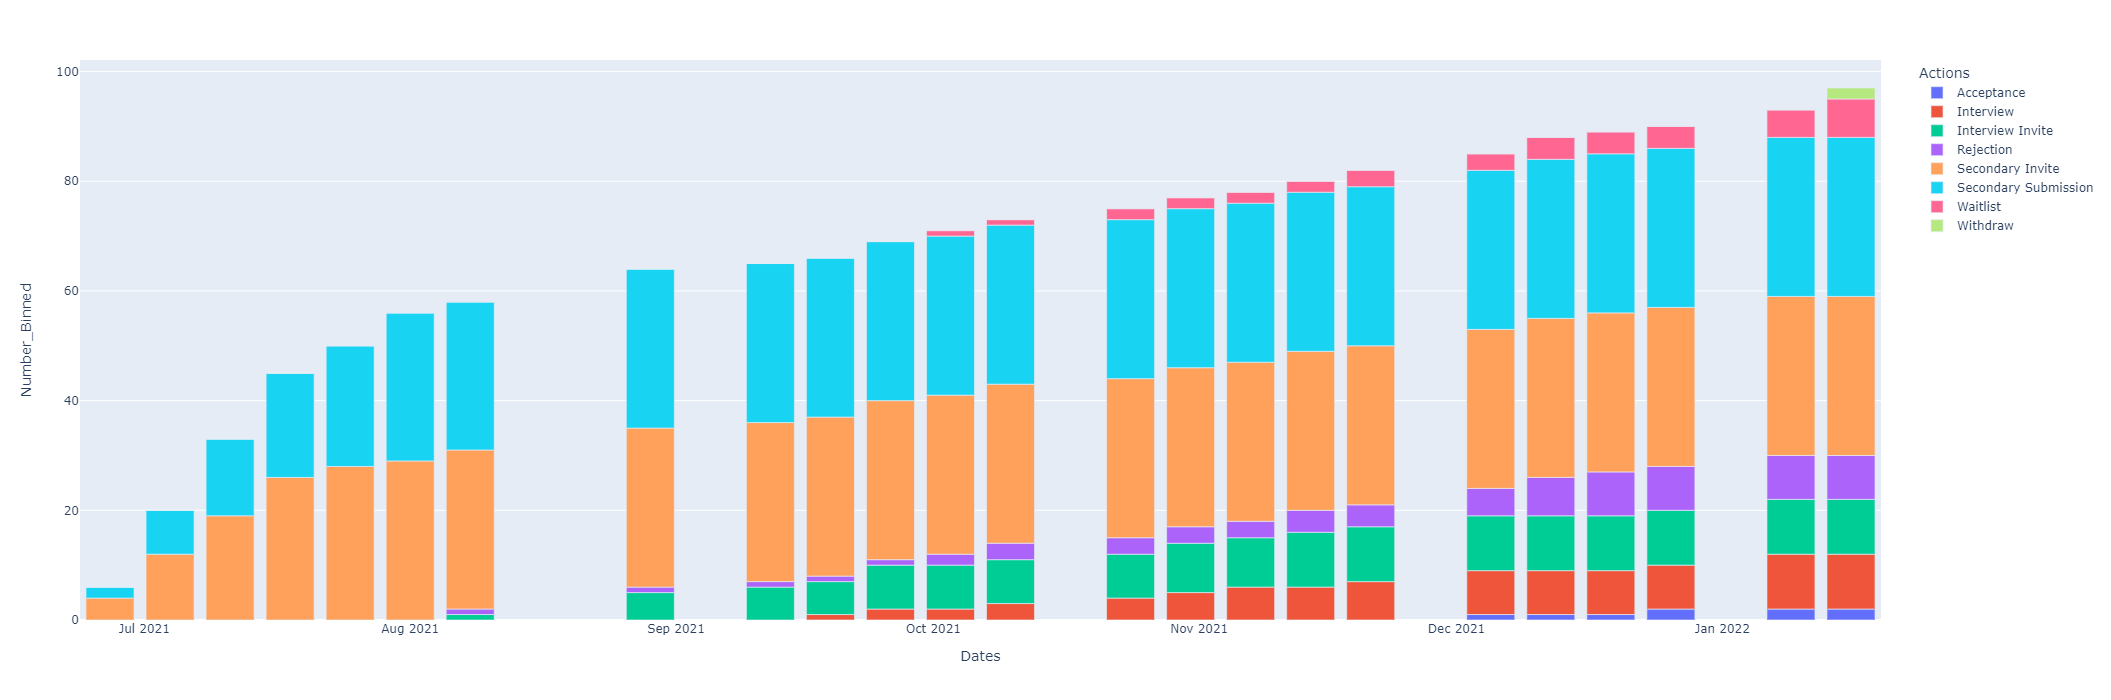

In [81]:
bar = px.bar(df, x="Dates", y="Number_Binned", color="Actions", width=1200, height=700)
bar.show()

### Plotting the Application Cycle as a line graph

In [4]:
action_color_dict = {}
for action in sorted(column_names):
    hex_color = input(f"Enter a hex color to represent {action}:")
    action_color_dict[action] = hex_color
action_color_dict

Enter a hex color to represent acceptance: 
Enter a hex color to represent interview: 
Enter a hex color to represent interview invite: 
Enter a hex color to represent rejection: 
Enter a hex color to represent secondary invite: 
Enter a hex color to represent secondary submission: 
Enter a hex color to represent waitlist: 
Enter a hex color to represent withdraw: 


{'acceptance': '',
 'interview': '',
 'interview invite': '',
 'rejection': '',
 'secondary invite': '',
 'secondary submission': '',
 'waitlist': '',
 'withdraw': ''}

In [5]:
response = input("Do you want a light-mode or dark-mode graph:")
response_dict = {"light": "simple_white", "dark": "plotly_dark"}
response_answer = response_dict[response]
response_answer

Do you want a light-mode or dark-mode graph: dark


'plotly_dark'

In [24]:
dan_sort2.columns

Index(['Schools', 'Actions', 'Dates', 'tracker'], dtype='object')

In [4]:
color_map = {"Acceptance": "#00ff44", "Interview": "#3064ff", "Interview Invite": "#87cfff", "Rejection": "#ff0000", "Secondary Submission": "#9afa14", "Waitlist": "#fa14aa", "Withdraw": "#9e959b"}